In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv("DayUse_Webscrape_DataFile.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'Day_of_week', 'Hotel_name', 'Link', 'Stars',
       'Location', 'Current_price_HKD', 'Original_prices_HKD',
       'Discount_percentage', 'Rating', 'Total_reviews',
       'Wheelchair accessible rooms', 'Business center', 'Bar',
       'Parking close by', 'Valet Parking', 'Rooftop bar', 'Sauna',
       'Free WiFi', 'WiFi (fees apply)', 'Outdoor pool', 'Jacuzzi',
       'Free airport shuttle', 'Restaurant', 'Concierge Service', 'Steam room',
       'Parking (fees apply)', 'Indoor pool', 'Pet friendly',
       'Designated smoking area', 'Meeting room',
       'Airport shuttle (fees apply)', 'Express dry cleaning', 'Terrace',
       'Rooftop pool', 'Fitness room', 'Massage', 'Spa', 'Elevator',
       'Cleanliness', 'Check-in', 'Room Quality', 'Reception', 'Access',
       'Value_for_money', 'Amenities', 'Tranquility'],
      dtype='object')

In [6]:
df["Expense"] = df["Current_price_HKD"].apply(lambda x: "1: Very Cheap" if x>=200 and x<300 else ("2: Cheap" if x>=300 and x<400 else ("3: Normal" if x>=400 and x<500 else ("4: Upper Normal" if x>=500 and x<600 else ("5: Mildly Expensve" if x>=600 and x<700 else ("6: Expensive" if x>=700 and x<800 else ("7: Very Expensive" if x>=800 and x<900 else "8: Extremely Expensive")))))))

In [7]:
df2=df.drop_duplicates(subset=['Hotel_name'])

In [8]:
df2["Expense"].value_counts()

2: Cheap                  36
3: Normal                 32
4: Upper Normal           22
5: Mildly Expensve         6
8: Extremely Expensive     5
6: Expensive               4
7: Very Expensive          3
Name: Expense, dtype: int64

In [10]:
plt.rcParams['figure.figsize'] = (20, 10)

In [31]:
plt.style.use('bmh') 

In [12]:
df["Current_price_HKD"].min()

280

<AxesSubplot:xlabel='Date'>

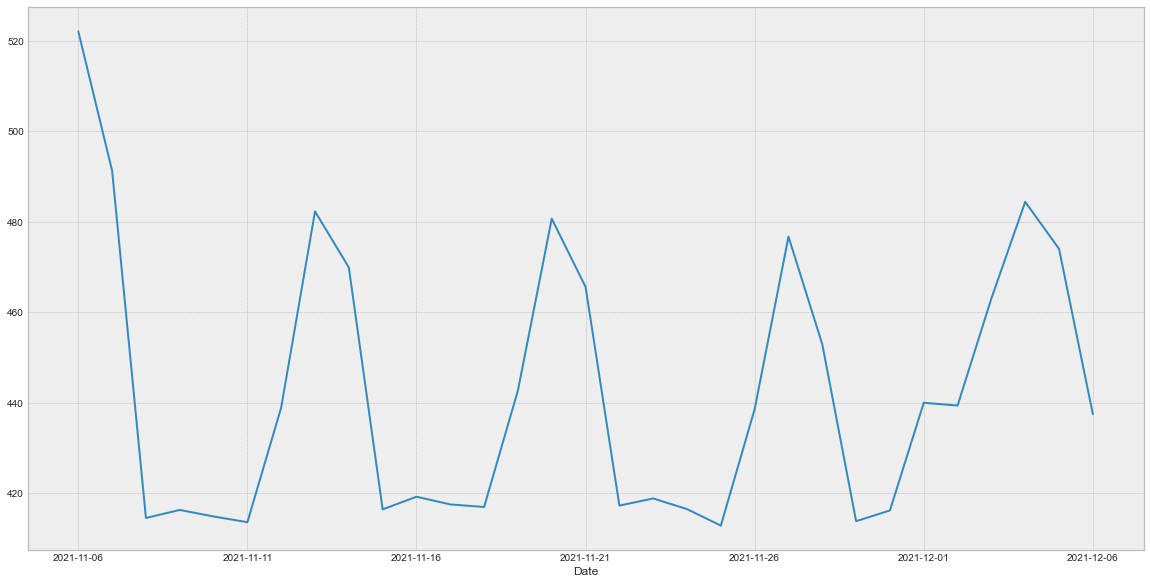

In [32]:
df.groupby("Date").Current_price_HKD.mean().plot.line()

<AxesSubplot:xlabel='Location'>

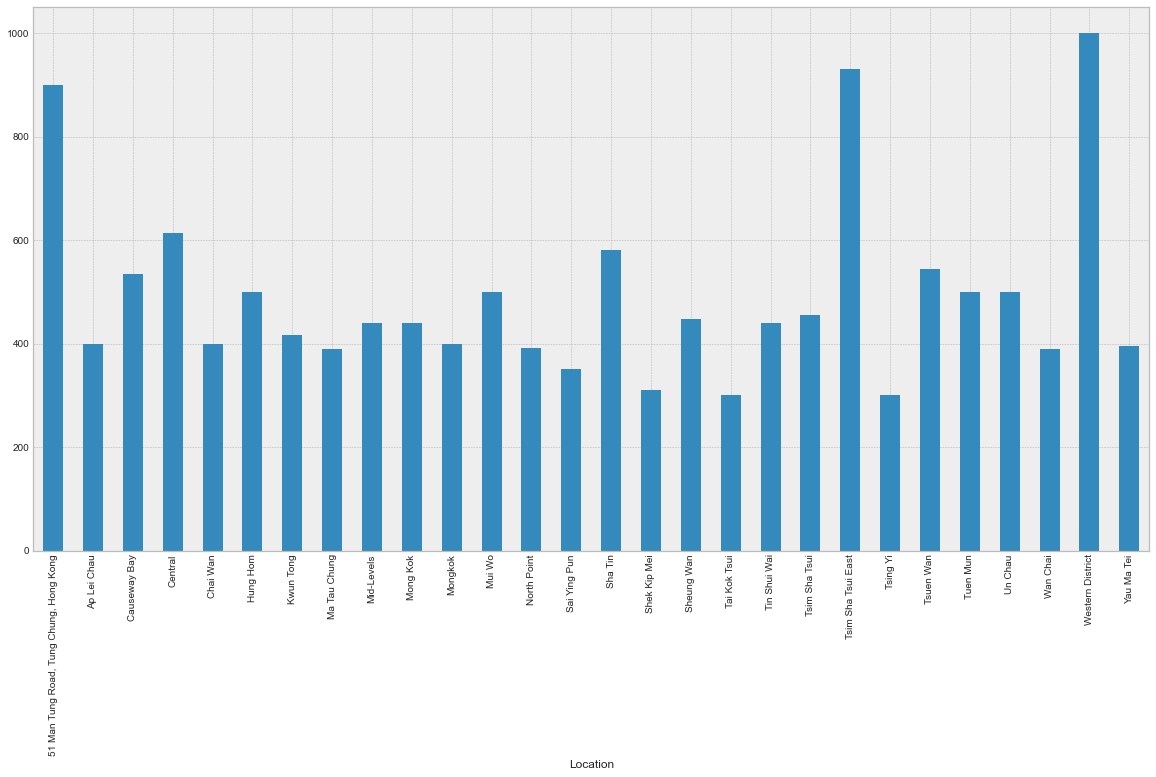

In [33]:
df2.groupby("Location").Current_price_HKD.mean().plot.bar()

<AxesSubplot:xlabel='Rating'>

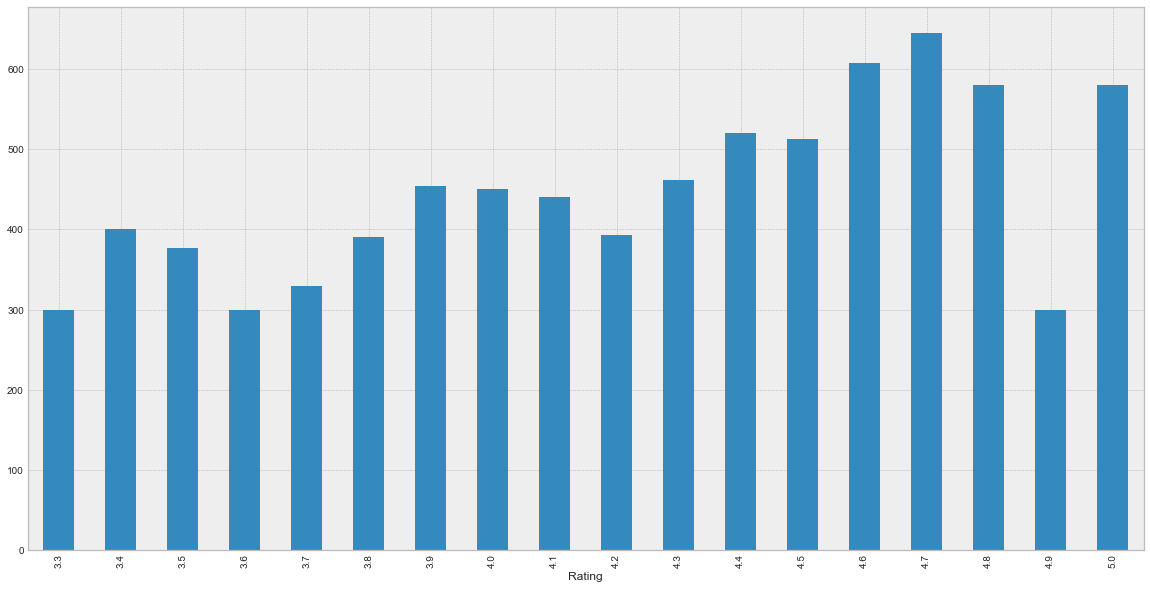

In [40]:
df2.groupby("Rating").Current_price_HKD.mean().plot.bar()

In [25]:
l3=df2[l].mean().sort_values().index.to_list()

In [26]:
l3

['Valet Parking',
 'Pet friendly',
 'Free airport shuttle',
 'Indoor pool',
 'WiFi (fees apply)',
 'Jacuzzi',
 'Steam room',
 'Massage',
 'Spa',
 'Rooftop bar',
 'Rooftop pool',
 'Sauna',
 'Terrace',
 'Designated smoking area',
 'Outdoor pool',
 'Parking (fees apply)',
 'Parking close by',
 'Express dry cleaning',
 'Concierge Service',
 'Airport shuttle (fees apply)',
 'Bar',
 'Meeting room',
 'Business center',
 'Fitness room',
 'Restaurant',
 'Wheelchair accessible rooms',
 'Free WiFi',
 'Elevator']

In [27]:
np.array_split(l3, 4)[0].tolist()

['Valet Parking',
 'Pet friendly',
 'Free airport shuttle',
 'Indoor pool',
 'WiFi (fees apply)',
 'Jacuzzi',
 'Steam room']

In [23]:
l=['Airport shuttle (fees apply)',
 'Bar',
 'Business center',
 'Concierge Service',
 'Designated smoking area',
 'Elevator',
 'Express dry cleaning',
 'Fitness room',
 'Free WiFi',
 'Free airport shuttle',
 'Indoor pool',
 'Jacuzzi',
 'Massage',
 'Meeting room',
 'Outdoor pool',
 'Parking (fees apply)',
 'Parking close by',
 'Pet friendly',
 'Restaurant',
 'Rooftop bar',
 'Rooftop pool',
 'Sauna',
 'Spa',
 'Steam room',
 'Terrace',
 'Valet Parking',
 'Wheelchair accessible rooms',
 'WiFi (fees apply)']

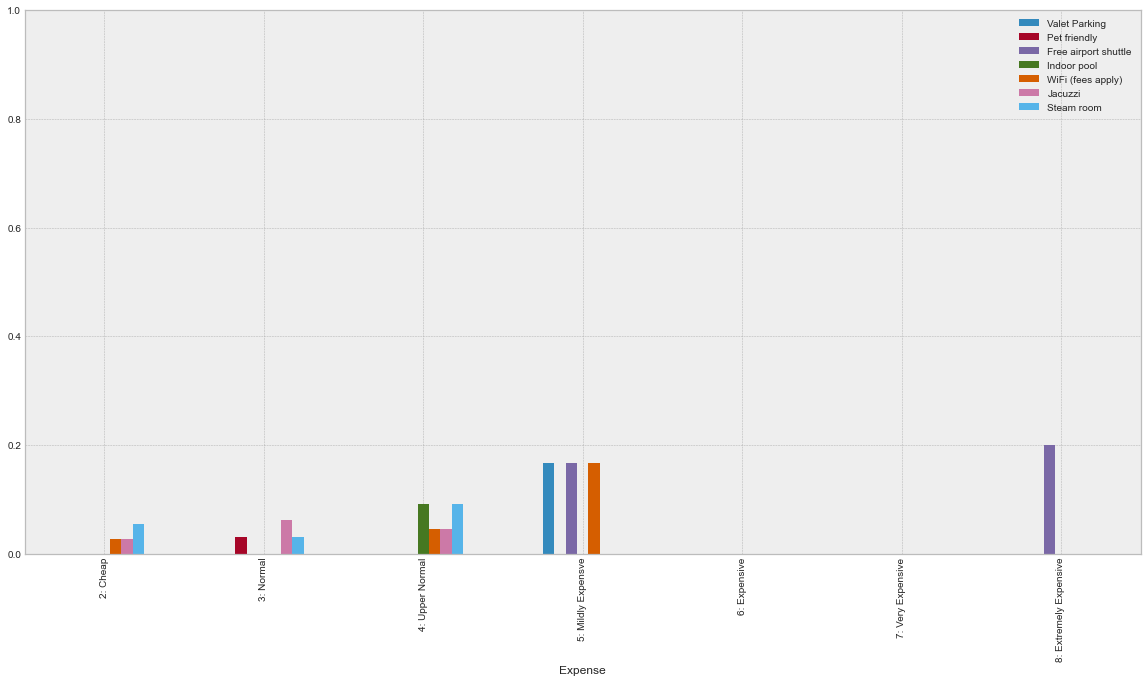

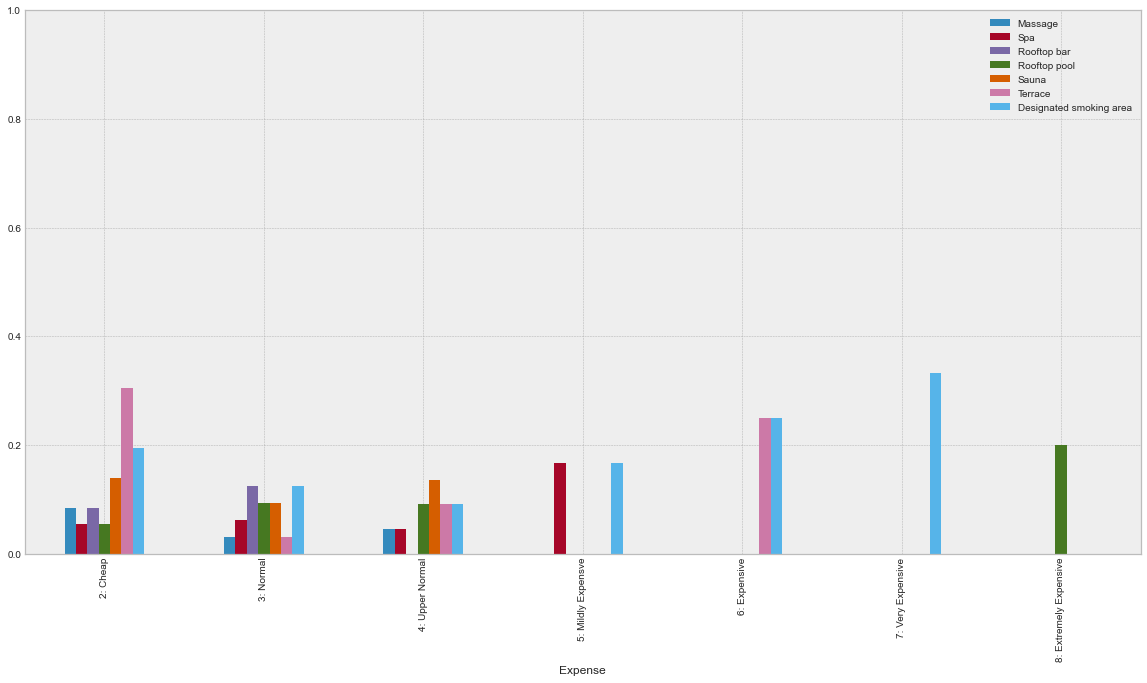

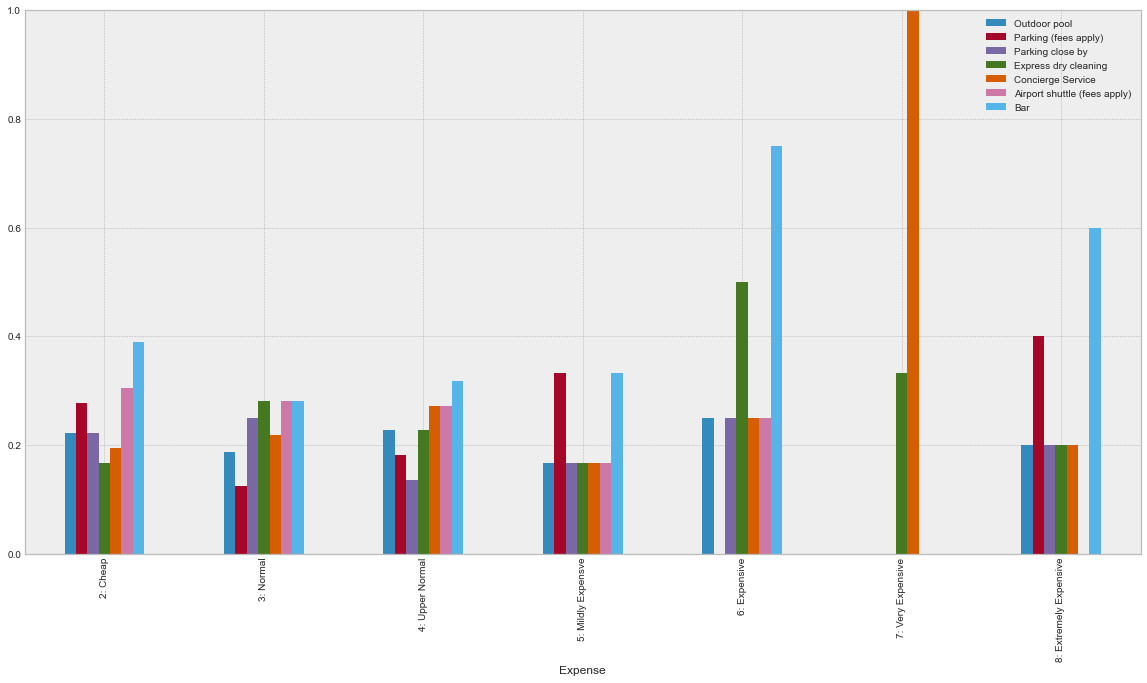

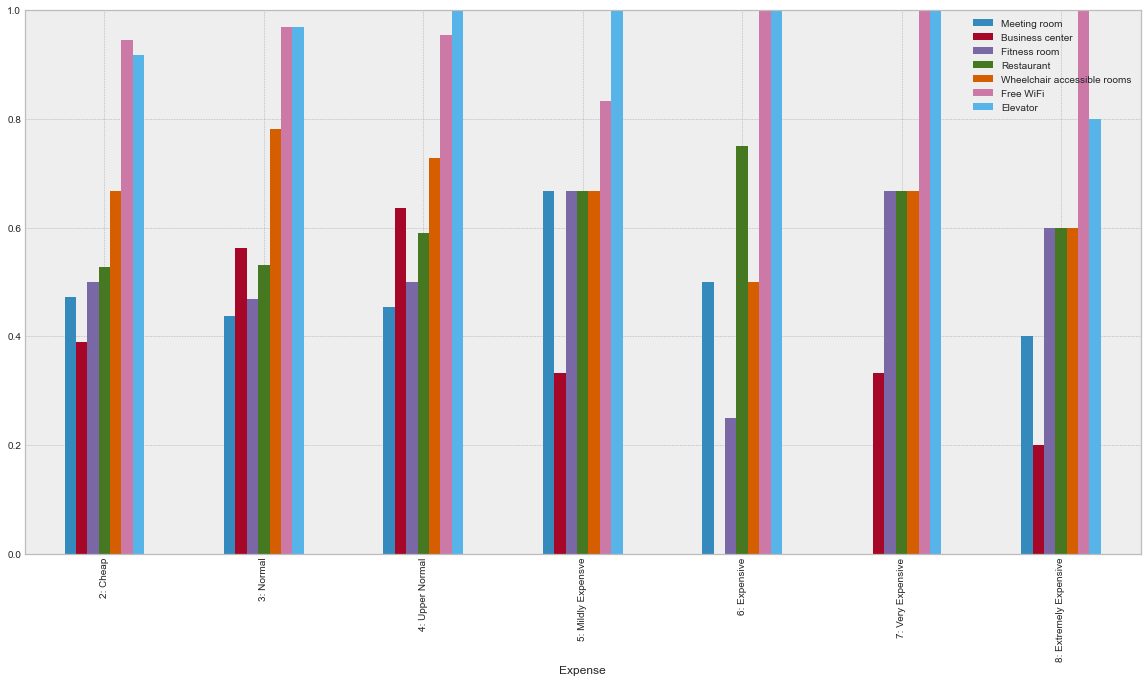

In [35]:
for i in np.array_split(l3, 4):
    subplot1=df2.groupby("Expense")[i.tolist()].mean().plot.bar()
    subplot1.set_ylim(0,1)

In [29]:
l2=['Cleanliness', 'Check-in', 'Room Quality', 'Reception', 'Access',
       'Value_for_money', 'Amenities', 'Tranquility']

(3.8, 5.0)

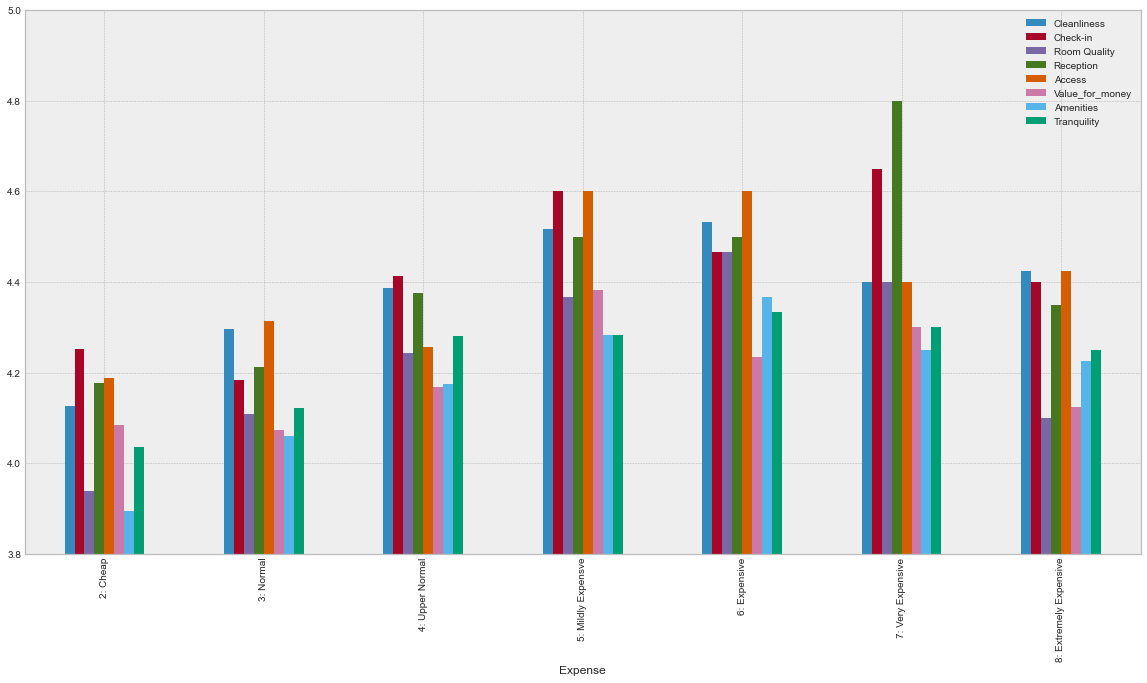

In [36]:
subplot=df2.groupby("Expense")[l2].mean().plot.bar()
subplot.set_ylim(3.8,5)